[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/zea/Desktop/NSU-ROS2-competition/ros2_packages/my_robot_controller/model


## Install YOLO11 via Ultralytics

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu124 CPU (AMD Ryzen 5 5500U with Radeon Graphics)
Setup complete ✅ (12 CPUs, 15.0 GB RAM, 39.3/45.5 GB disk)


## Inference with model pre-trained on COCO dataset

### CLI

**NOTE:** CLI requires no customization or Python code. You can simply run all tasks from the terminal with the yolo command.

**NOTE:** Result annotated image got saved in `{HOME}/runs/detect/predict/`. Let's display it.

### SDK

**NOTE:** YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

**NOTE:** YOLO11 can be easily integrated with `supervision` using the familiar `from_ultralytics` connector.

## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [4]:
roboflow_api_key="0az8ziNbTVpKHYaILb91"

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=roboflow_api_key)
project = rf.workspace("nsu-sxhmy").project("ros-2-competition")
version = project.version(6)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ROS-2-competition-6 in yolov11:: 100%|██████████| 375/375 [00:00<00:00, 9158.62it/s]


## Custom Training

In [7]:
%cd {HOME}
!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=350 batch=84 imgsz=640 plots=True augment=True fliplr=0.0

/kaggle/working
New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/ROS-2-competition-6/data.yaml, epochs=350, time=None, patience=100, batch=84, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

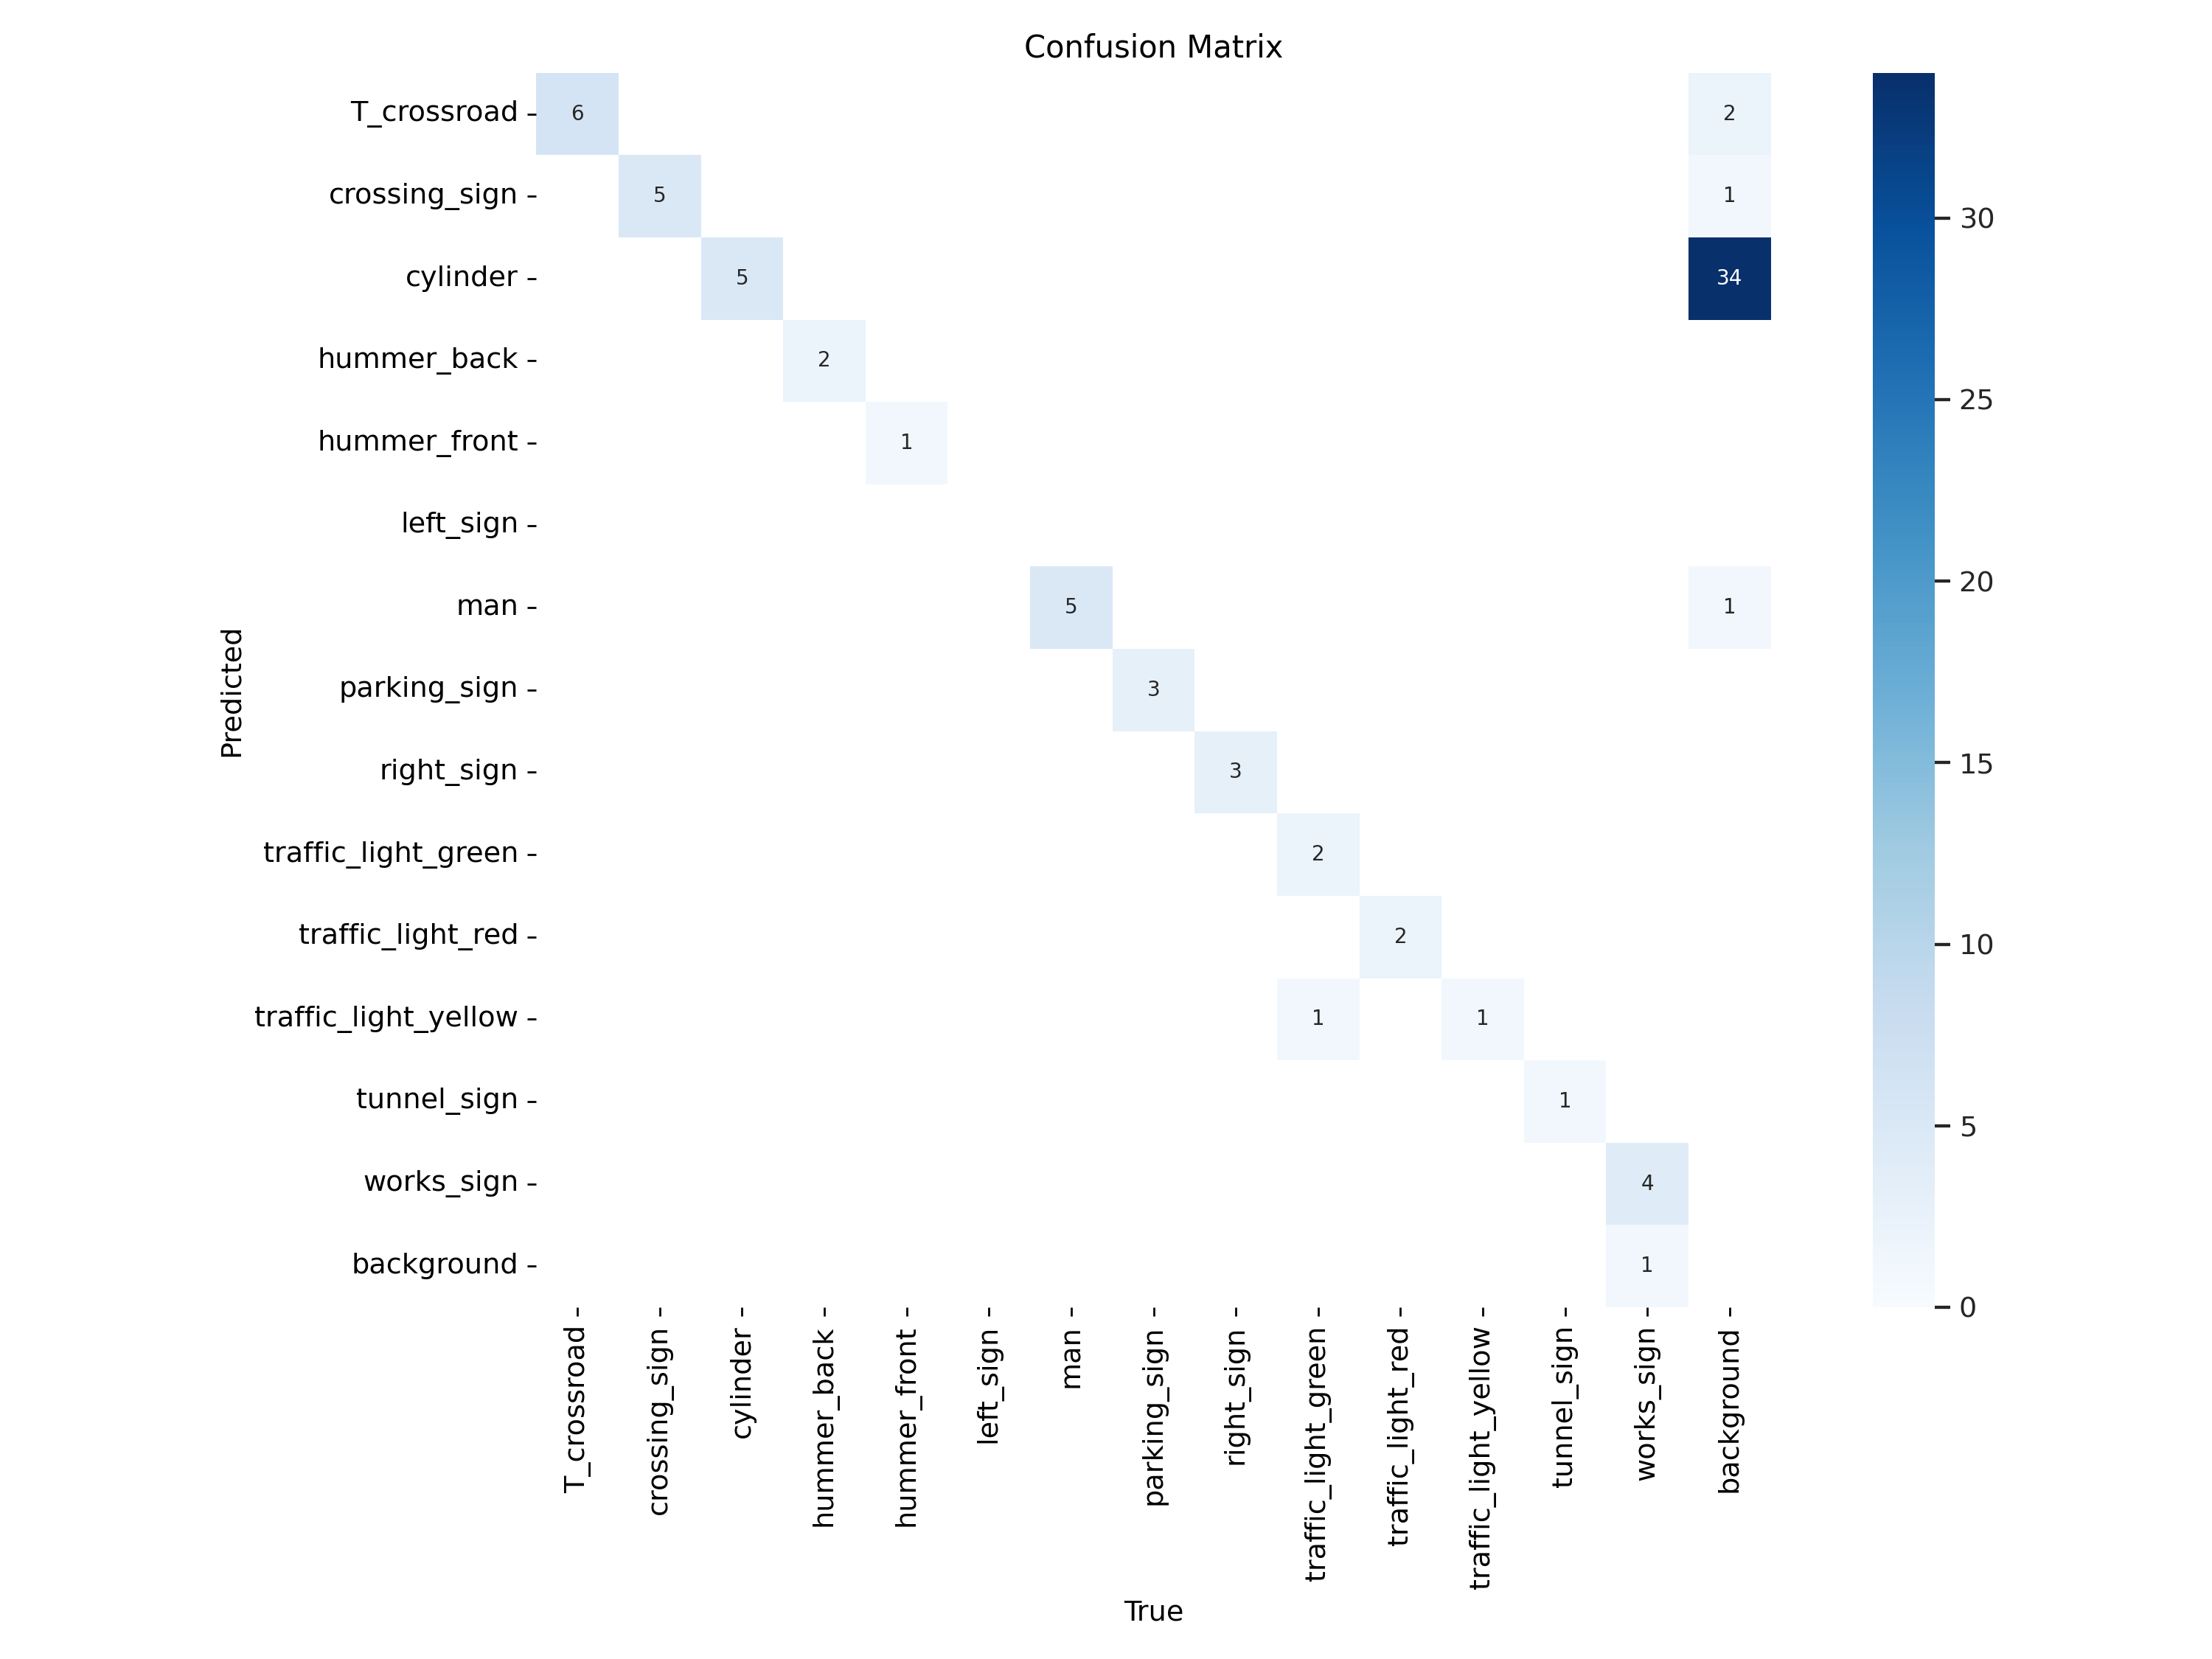

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

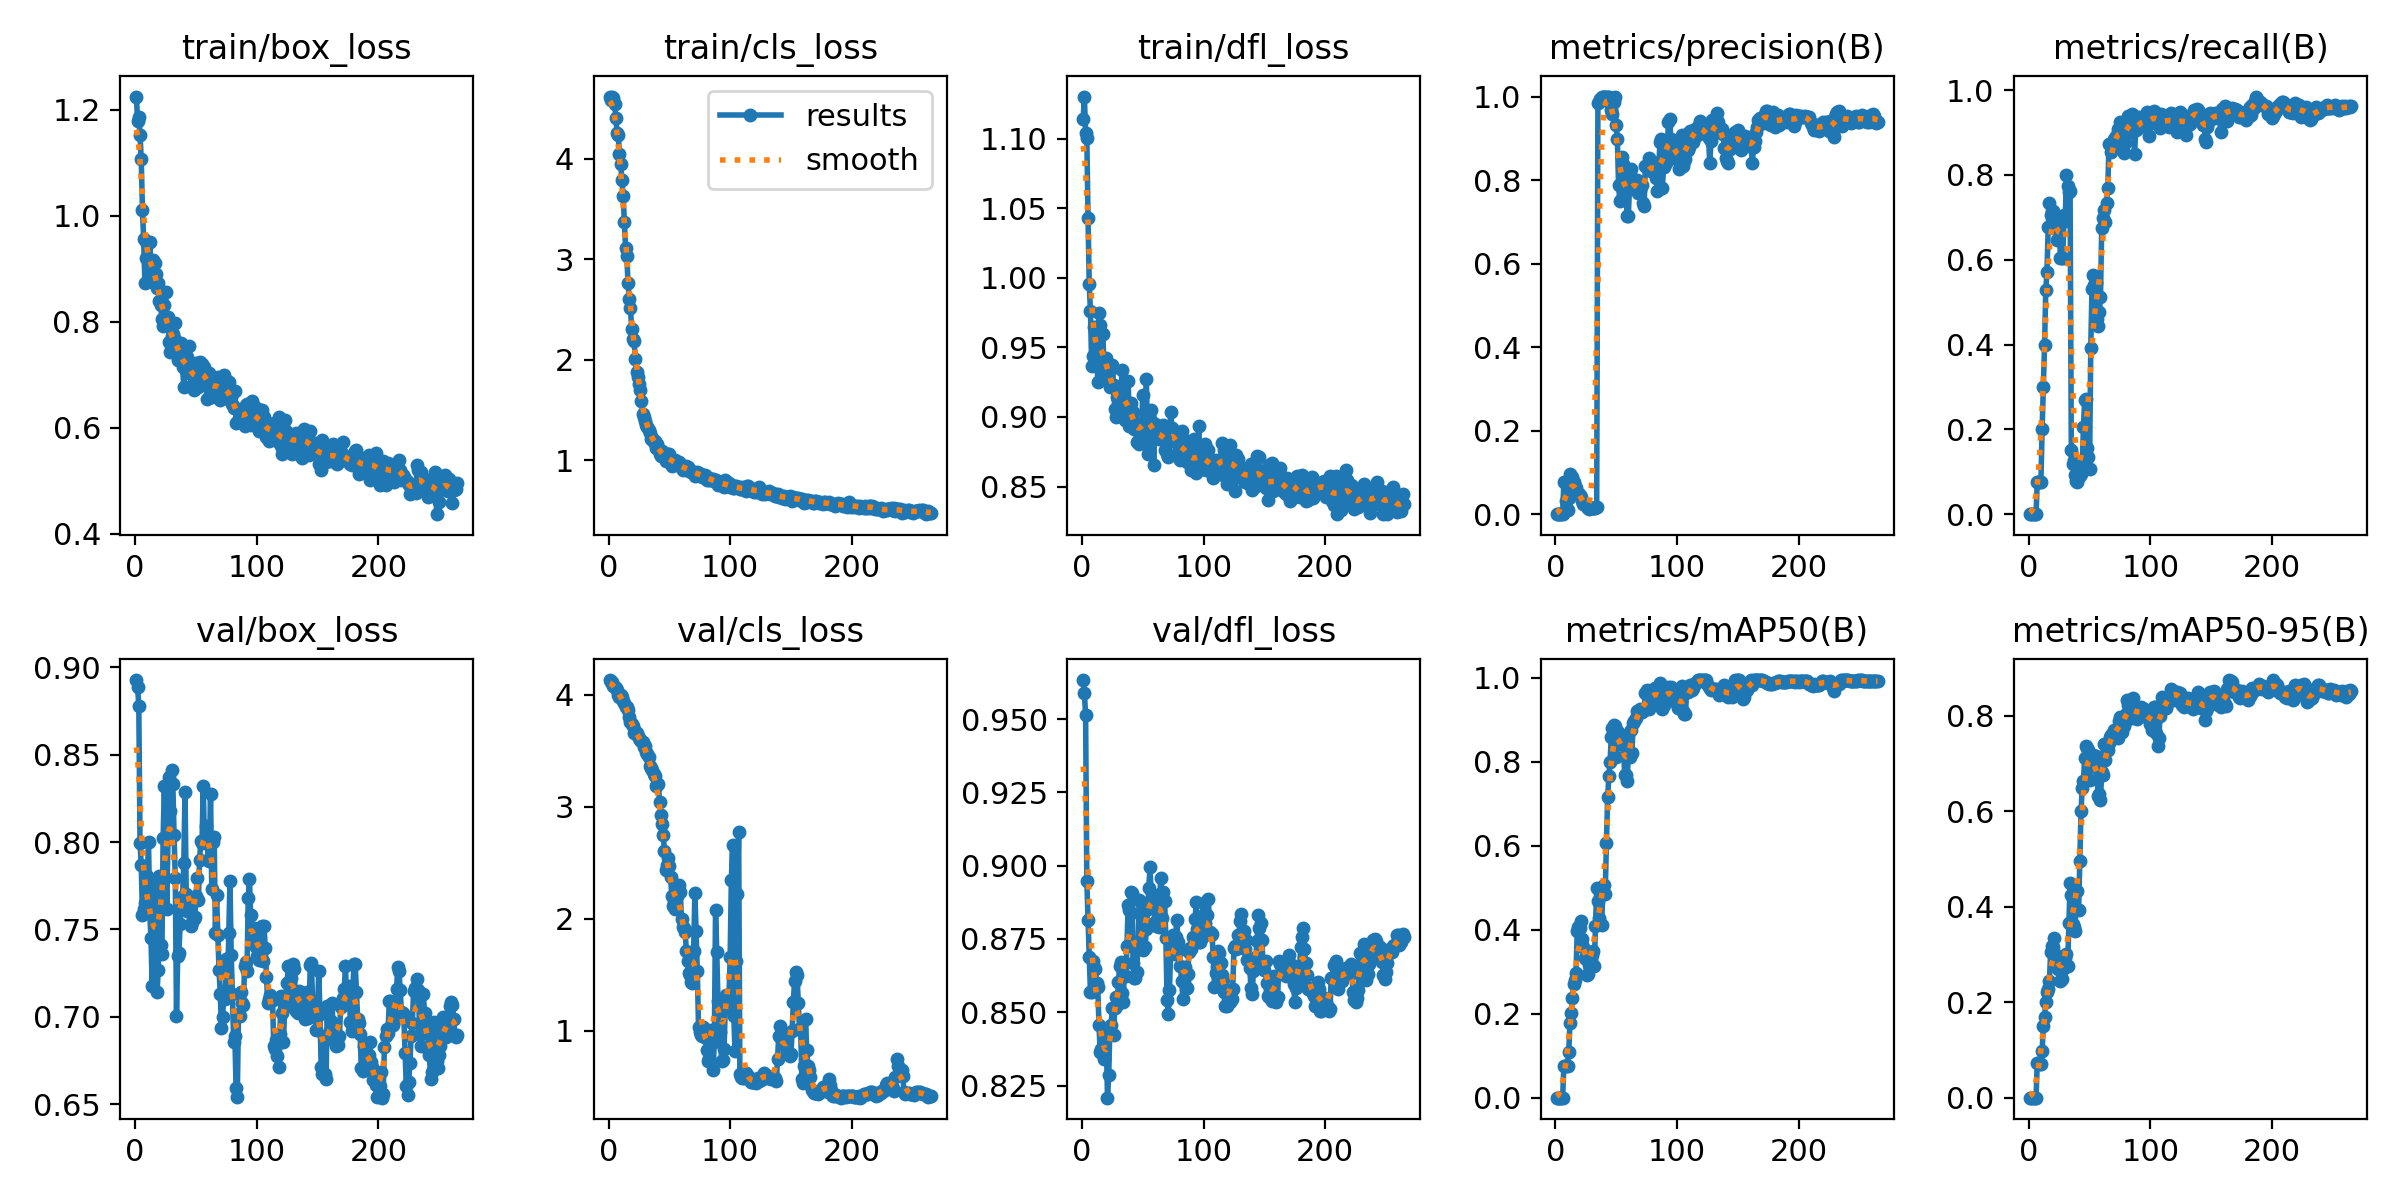

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

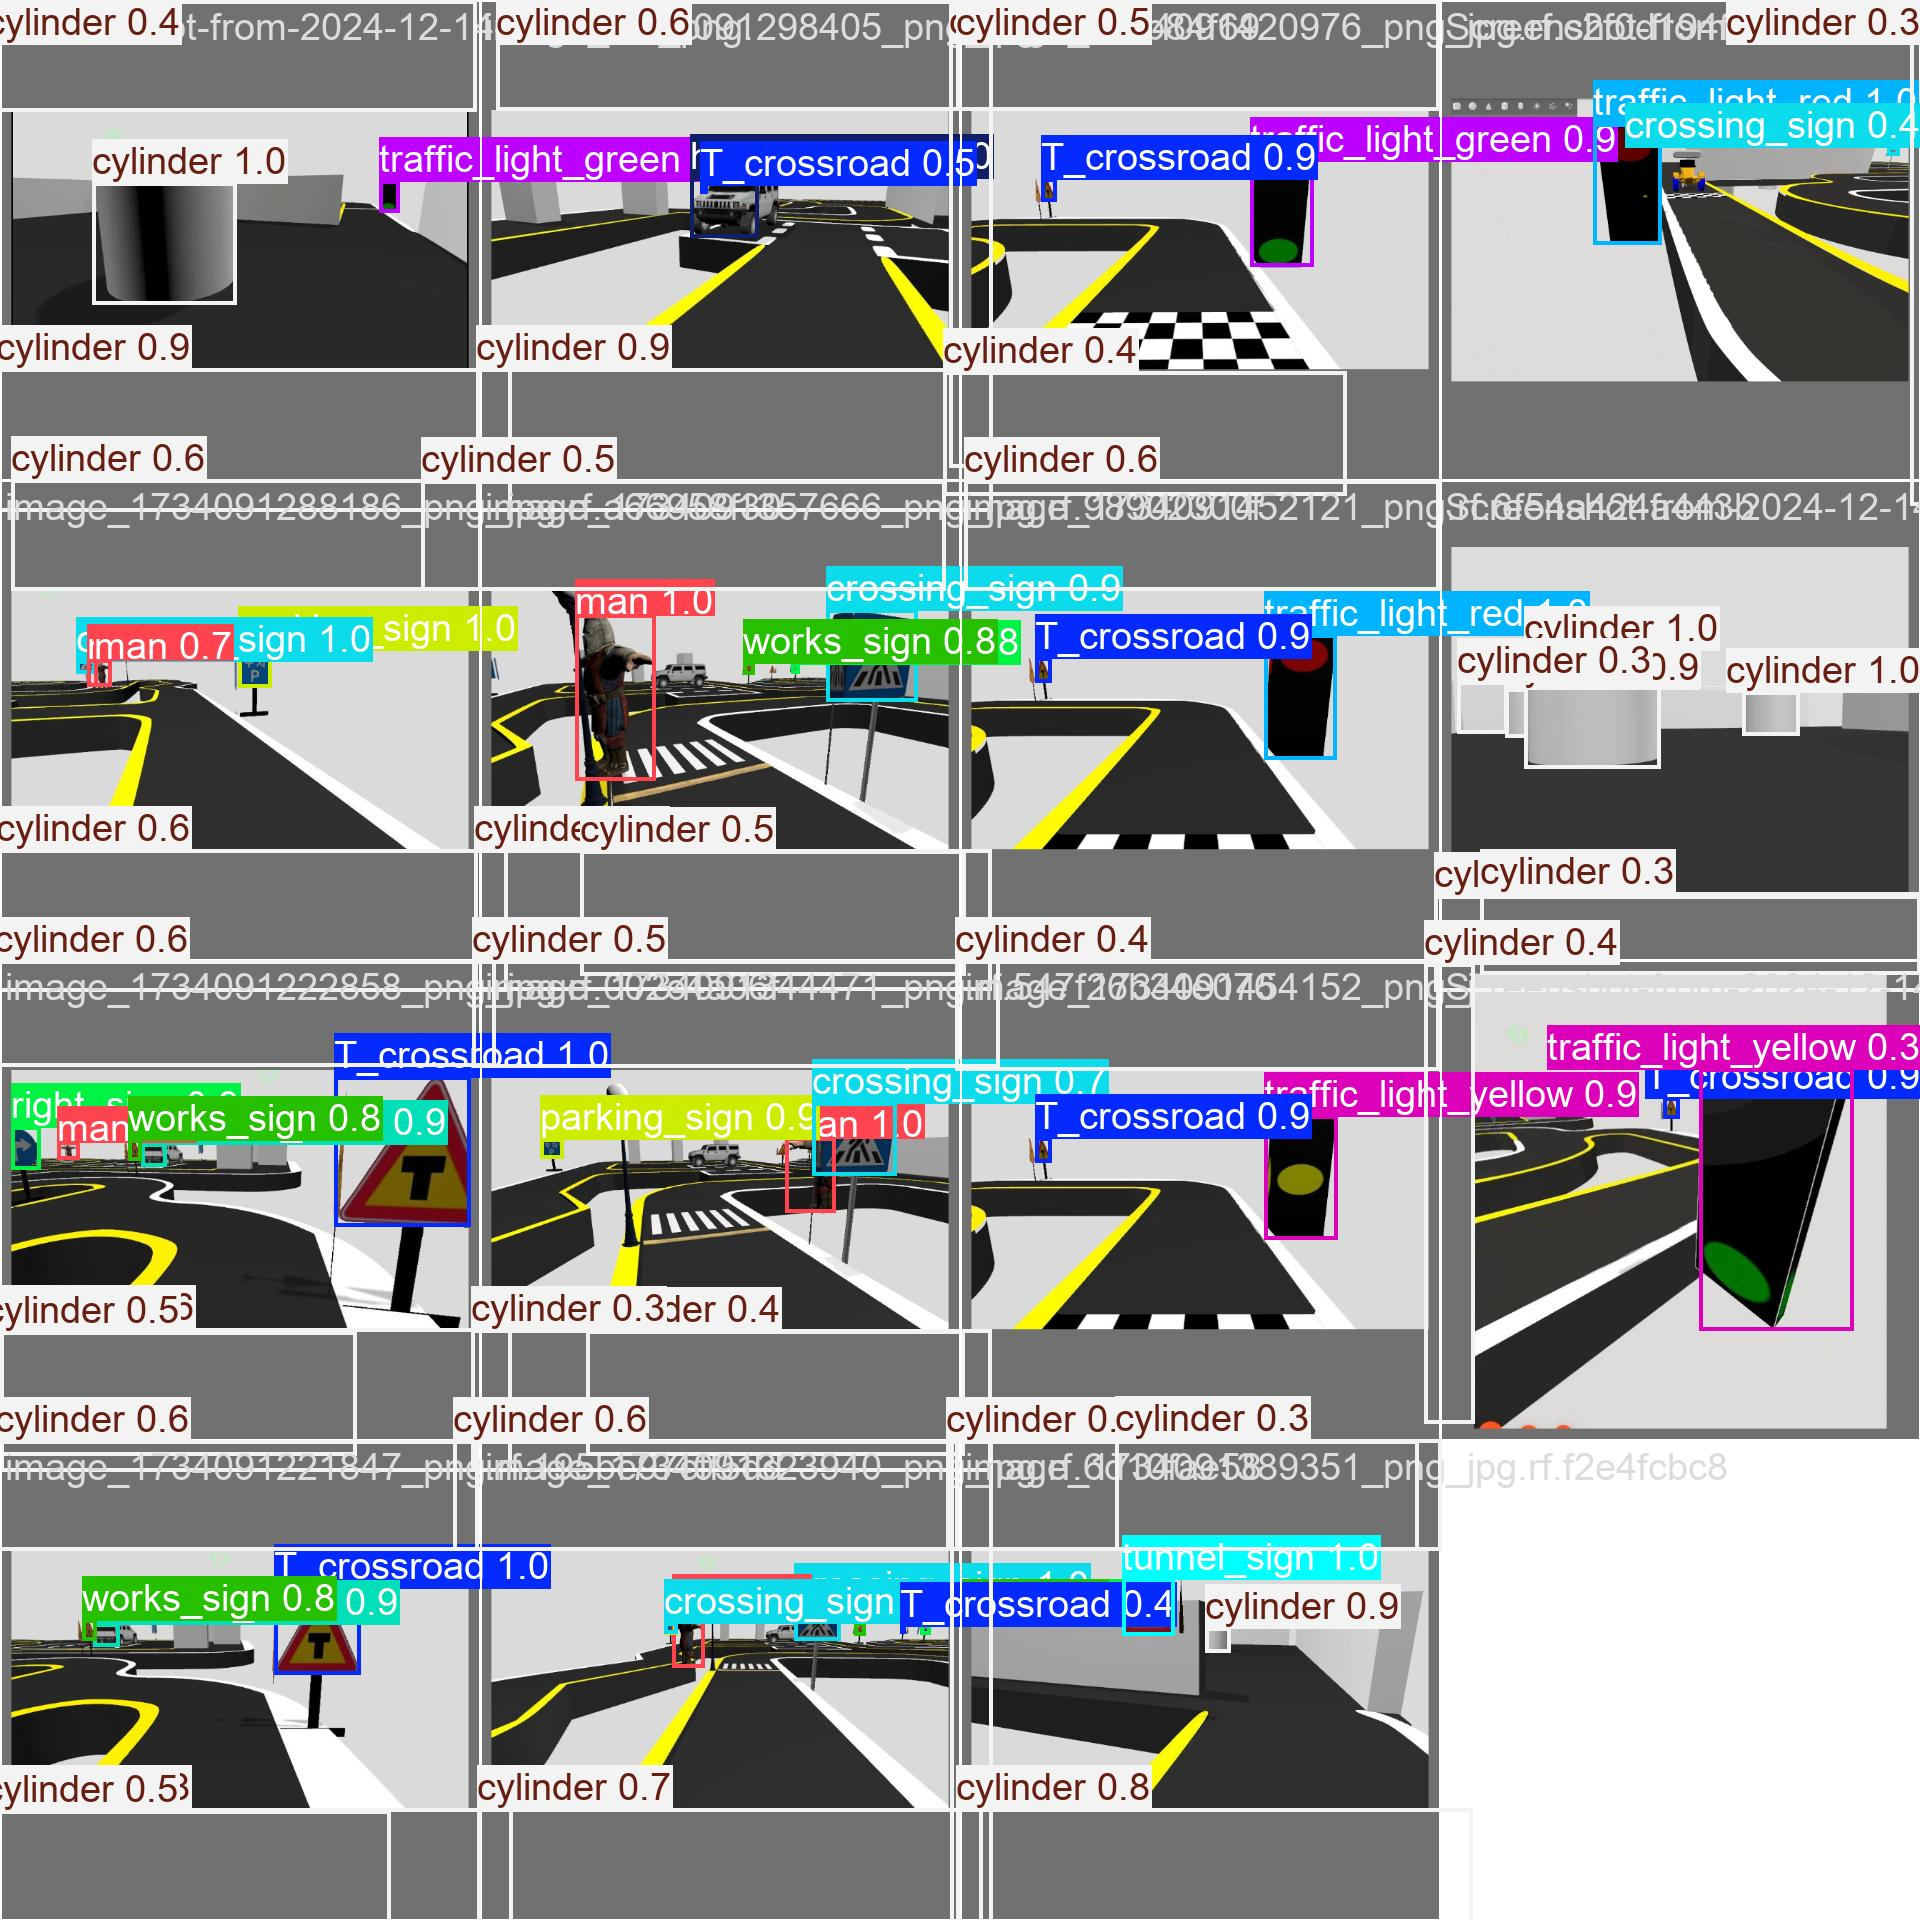

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [11]:
!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,584,882 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /kaggle/working/ROS-2-competition-6/valid/labels.cache... 15 image
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         15         42      0.916      0.949      0.995      0.863
           T_crossroad          6          6      0.958          1      0.995       0.76
         crossing_sign          5          5          1       0.82      0.995      0.741
              cylinder          3          5      0.685          1      0.995      0.955
           hummer_back          2          2      0.932          1      0.995      0.895
          hummer_front          1          1        0.9          1      0.995      0.895
                   man          5          5      0.976          1      0.995      0.701
          parking_sign          3          3       0.94 

In [6]:
!yolo task=detect mode=predict model=/home/zea/Desktop/NSU-ROS2-competition/ros2_packages/my_robot_controller/model/best.pt source=//home/zea/Desktop/NSU-ROS2-competition/media/videos/track_video.avi conf=0.05 save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu124 CPU (AMD Ryzen 5 5500U with Radeon Graphics)
YOLO11n summary (fused): 238 layers, 2,584,882 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/1522) //home/zea/Desktop/NSU-ROS2-competition/media/videos/track_video.avi: 384x640 1 T_crossroad, 65.5ms
video 1/1 (frame 2/1522) //home/zea/Desktop/NSU-ROS2-competition/media/videos/track_video.avi: 384x640 1 T_crossroad, 48.1ms
video 1/1 (frame 3/1522) //home/zea/Desktop/NSU-ROS2-competition/media/videos/track_video.avi: 384x640 1 T_crossroad, 50.4ms
video 1/1 (frame 4/1522) //home/zea/Desktop/NSU-ROS2-competition/media/videos/track_video.avi: 384x640 1 T_crossroad, 49.0ms
video 1/1 (frame 5/1522) //home/zea/Desktop/NSU-ROS2-competition/media/videos/track_video.avi: 384x640 1 T_crossroad, 51.4ms
video 1/1 (frame 6/1522) //home/zea/Desktop/NSU-ROS2-competition/media/videos/track_video.avi: 384x640 1 T_crossroad, 55.3ms
video 1/1 (frame 7/1522) //home/zea/Desktop/NSU-ROS2-competition/me

## Inference with custom model

**NOTE:** Let's take a look at few results.

## Deploy model on Roboflow

Once you have finished training your YOLOv11 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv11 weights.

In [ ]:
# project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
# !pip install inference

In [ ]:
  # import os, random, cv2
  # import supervision as sv
  # import IPython
  # import inference

  # model_id = project.id.split("/")[1] + "/" + dataset.version
  # model = inference.get_model(model_id, userdata.get('ROBOFLOW_API_KEY'))

  # # Location of test set images
  # test_set_loc = dataset.location + "/test/images/"
  # test_images = os.listdir(test_set_loc)

  # # Run inference on 4 random test images, or fewer if fewer images are available
  # for img_name in random.sample(test_images, min(4, len(test_images))):
  #     print("Running inference on " + img_name)

  #     # Load image
  #     image = cv2.imread(os.path.join(test_set_loc, img_name))

  #     # Perform inference
  #     results = model.infer(image, confidence=0.4, overlap=30)[0]
  #     detections = sv.Detections.from_inference(results)

  #     # Annotate boxes and labels
  #     box_annotator = sv.BoxAnnotator()
  #     label_annotator = sv.LabelAnnotator()
  #     annotated_image = box_annotator.annotate(scene=image, detections=detections)
  #     annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

  #     # Display annotated image
  #     _, ret = cv2.imencode('.jpg', annotated_image)
  #     i = IPython.display.Image(data=ret)
  #     IPython.display.display(i)


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.